## WINE QUALITY ANALYSIS

Importing the necessary libraries:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Importing the csv file


In [5]:
df = pd.read_csv("Wine_quality.csv")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [6]:
df.shape

(1599, 12)

Checking which indexes have quality greater than or equal to 7

In [46]:
filtered = df[df['quality']>=7]
print(filtered.index)

Int64Index([   7,    8,   16,   37,   62,  128,  198,  200,  205,  206,
            ...
            1468, 1475, 1477, 1494, 1534, 1541, 1544, 1549, 1555, 1584],
           dtype='int64', length=217)


Later we will use 7 as the quality for good wine

In [47]:
print(df.iloc[7])

fixed acidity           7.3000
volatile acidity        0.6500
citric acid             0.0000
residual sugar          1.2000
chlorides               0.0650
free sulfur dioxide    15.0000
TotalSulphurDioxide    21.0000
density                 0.9946
pH                      3.3900
sulphates               0.4700
alcohol                10.0000
quality                 7.0000
Name: 7, dtype: float64


Checking for null values

In [7]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

Particular rows with null values

In [8]:
print(df[df.isnull().any(axis = 1)])

     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
9              7.5              0.50         0.36             6.1      0.071   
123            8.0              0.71         0.00             2.6      0.080   
184            6.7              0.62         0.21             1.9      0.079   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
9                   17.0                   NaN   0.9978  3.35       0.80   
123                 11.0                  34.0   0.9976  3.44       0.53   
184                  8.0                  62.0   0.9970   NaN       0.58   

     alcohol  quality  
9       10.5      5.0  
123      9.5      NaN  
184      9.3      6.0  


Renaming the "total sulphur dioxide" column 

In [9]:
df.rename(columns = {'total sulfur dioxide':'TotalSulphurDioxide'}, inplace = True)

Removing the row with null value in the quality column


In [10]:
df = df.dropna(subset=['quality'])

Replacing the null values with the mean values of the particular column

In [11]:
df.pH.fillna(df.pH.mean(), inplace=True)
df.TotalSulphurDioxide.fillna(df.TotalSulphurDioxide.mean(), inplace=True)

In [12]:
df.isna().sum()

fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
TotalSulphurDioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
dtype: int64

All the null values are hence removed

1. Data analysis and visualization
2. Statistical measures

In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,TotalSulphurDioxide,density,pH,sulphates,alcohol,quality
count,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000
mean,8.319837,0.527707,0.271145,2.538767,0.087471,15.877972,46.440827,0.996746,3.498622,0.658229,10.423561,5.636421
std,1.741623,0.179058,0.194744,1.410369,0.047080,10.462720,32.874776,0.001888,0.080333,0.169530,1.065751,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997837,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


Number of values for each quality

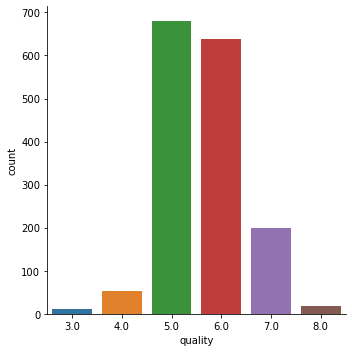

In [14]:
sns.catplot(x ='quality', data = df , kind = 'count' )

Volatile acidity and quality

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

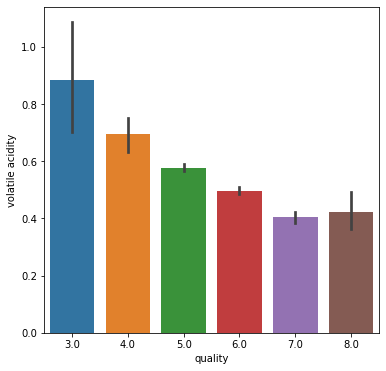

In [15]:
plot = plt.figure(figsize = (6,6))
sns.barplot(x = 'quality', y = "volatile acidity", data = df)

Citric acid and quality

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

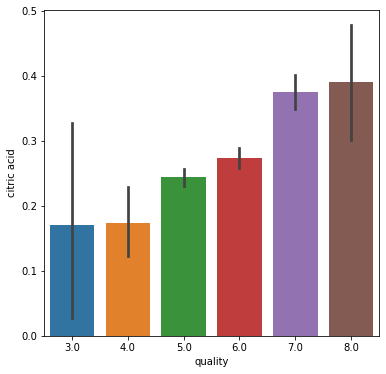

In [16]:
plot = plt.figure(figsize = (6,6))
sns.barplot(x = 'quality', y = "citric acid", data = df)

Residual sugar and quality


<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

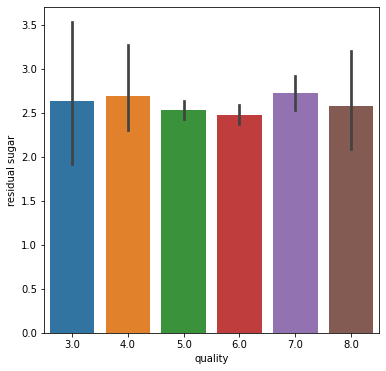

In [17]:
plot = plt.figure(figsize = (6,6))
sns.barplot(x = 'quality', y = "residual sugar", data = df)

Chlorides and quality

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

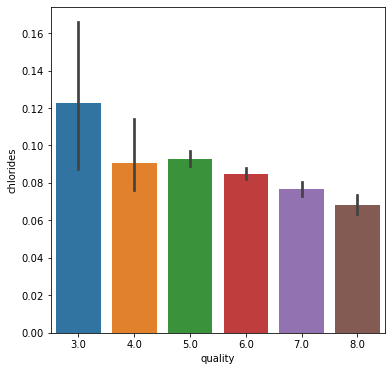

In [18]:
plot = plt.figure(figsize = (6,6))
sns.barplot(x = 'quality', y = "chlorides", data = df)

Free sulphur dioxide and quality


<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

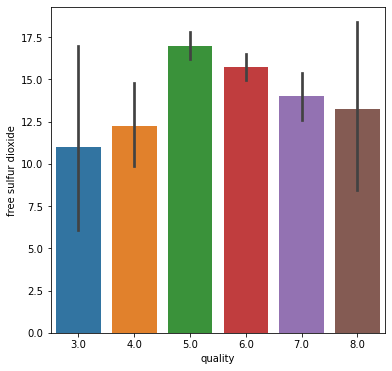

In [19]:
plot = plt.figure(figsize = (6,6))
sns.barplot(x = 'quality', y = "free sulfur dioxide", data = df)

TotalSulphurDioxide and quality


<AxesSubplot:xlabel='quality', ylabel='TotalSulphurDioxide'>

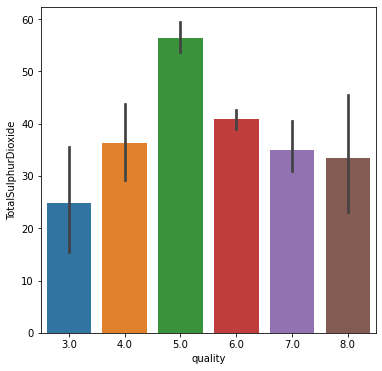

In [20]:
plot = plt.figure(figsize = (6,6))
sns.barplot(x = 'quality', y = "TotalSulphurDioxide", data = df)

Density and quality

<AxesSubplot:xlabel='quality', ylabel='density'>

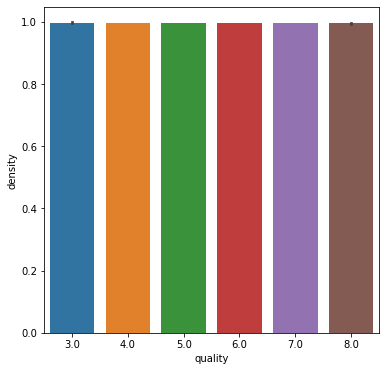

In [21]:
plot = plt.figure(figsize = (6,6))
sns.barplot(x = 'quality', y = "density", data = df)

PH and quality

<AxesSubplot:xlabel='quality', ylabel='pH'>

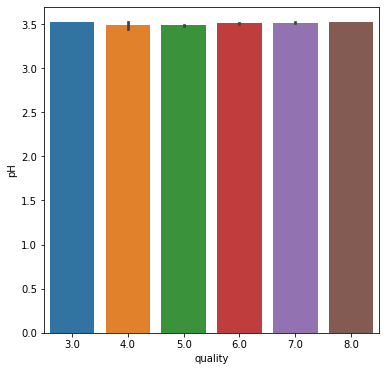

In [22]:
plot = plt.figure(figsize = (6,6))
sns.barplot(x = 'quality', y = "pH", data = df)

Sulphates and quality

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

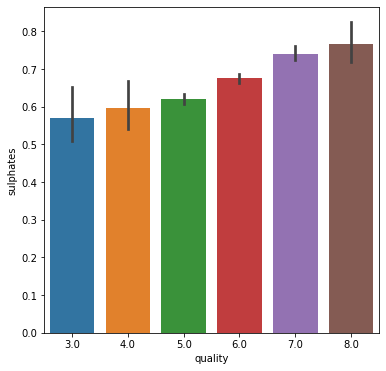

In [23]:
plot = plt.figure(figsize = (6,6))
sns.barplot(x = 'quality', y = "sulphates", data = df)

Alcohol and quality

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

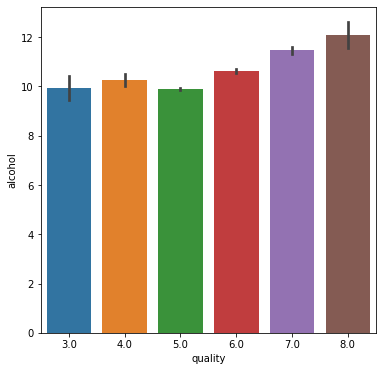

In [24]:
plot = plt.figure(figsize = (6,6))
sns.barplot(x = 'quality', y = "alcohol", data = df)

Finding the correlation of all the columns to the quality column

In [25]:
correlation = df.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,TotalSulphurDioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256100,0.671958,0.114783,0.093689,-0.153860,-0.112834,0.668149,0.027466,0.182953,-0.061783,0.123987
volatile acidity,-0.256100,1.000000,-0.552123,0.001891,0.061419,-0.010211,0.076972,0.021747,-0.046010,-0.260636,-0.201849,-0.390258
citric acid,0.671958,-0.552123,1.000000,0.143702,0.203810,-0.061425,0.034774,0.365586,0.007785,0.312357,0.109241,0.225867
residual sugar,0.114783,0.001891,0.143702,1.000000,0.055614,0.187074,0.200557,0.355294,0.040037,0.005549,0.042109,0.013756
chlorides,0.093689,0.061419,0.203810,0.055614,1.000000,0.005516,0.047778,0.200692,-0.258759,0.371255,-0.221280,-0.129011
free sulfur dioxide,-0.153860,-0.010211,-0.061425,0.187074,0.005516,1.000000,0.668114,-0.021817,-0.025604,0.051450,-0.069682,-0.050899
TotalSulphurDioxide,-0.112834,0.076972,0.034774,0.200557,0.047778,0.668114,1.000000,0.070858,-0.162798,0.041930,-0.206177,-0.184663
density,0.668149,0.021747,0.365586,0.355294,0.200692,-0.021817,0.070858,1.000000,-0.037748,0.148757,-0.496083,-0.174741
pH,0.027466,-0.046010,0.007785,0.040037,-0.258759,-0.025604,-0.162798,-0.037748,1.000000,-0.260943,0.233096,0.133952
sulphates,0.182953,-0.260636,0.312357,0.005549,0.371255,0.051450,0.041930,0.148757,-0.260943,1.000000,0.093223,0.251118


Constructing a heatmap to understand the correlation between the columns

<AxesSubplot:>

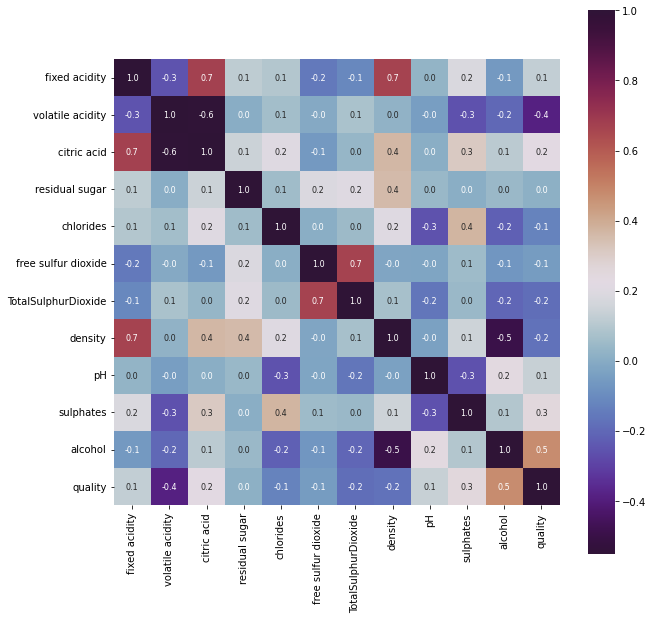

In [26]:
plt.figure(figsize = (10,10))
sns.heatmap(correlation,cmap = "twilight_shifted", cbar = True, square = True, fmt = '.1f',annot = True, annot_kws = {"size":8})

Data preprocessing

Separating the data and the label

In [27]:
X = df.drop('quality',axis = 1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,TotalSulphurDioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2


Label Binarization

In [28]:
Y = df['quality'].apply(lambda y_value:1 if y_value>=7 else 0)
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1598, dtype: int64

Train and test Split

In [29]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 3)

In [30]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1598,) (1278,) (320,)


Model Training

(Random Forest Classifier) 

In [31]:
model = RandomForestClassifier()

Fitting the data into the model

In [32]:
model.fit(X_train, Y_train)

RandomForestClassifier()

1. Model Evaluation
2. Accuracy on test data

In [33]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [34]:
print("Accuracy: " , test_data_accuracy)

Accuracy:  0.90625


In [43]:
X.iloc[267]

fixed acidity           6.9000
volatile acidity        0.5400
citric acid             0.0400
residual sugar          3.0000
chlorides               0.0770
free sulfur dioxide     7.0000
TotalSulphurDioxide    27.0000
density                 0.9987
pH                      3.5200
sulphates               0.9100
alcohol                 9.4000
Name: 268, dtype: float64

### Building a predictive system

In [50]:
def Quality(): 
    input_number = int(input("Enter the ID of the wine you want to see the quality for: "))

    if input_number < 0 or input_number > len(X):
        return "Invalid Input"
    else: 
        input_data = X.iloc[input_number,:].values

        #reshape the data as we are predicting the label for only one instance
        input_data_reshaped = input_data.reshape(1,-1)

        prediction = model.predict(input_data_reshaped)
        print(prediction)

        if prediction[0] == 1:
            return "Good quality Wine"
        else:
            return "Bad quality Wine"

In [51]:
Quality()

Enter the ID of the wine you want to see the quality for: 7
[1]


C:\Users\Anujit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'Good quality Wine'